In [ ]:
from google.colab import files
uploaded = files.upload()

Saving img_01.jpg to img_01.jpg
Saving img_02.jpg to img_02.jpg


In [2]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

## 1.

Part A

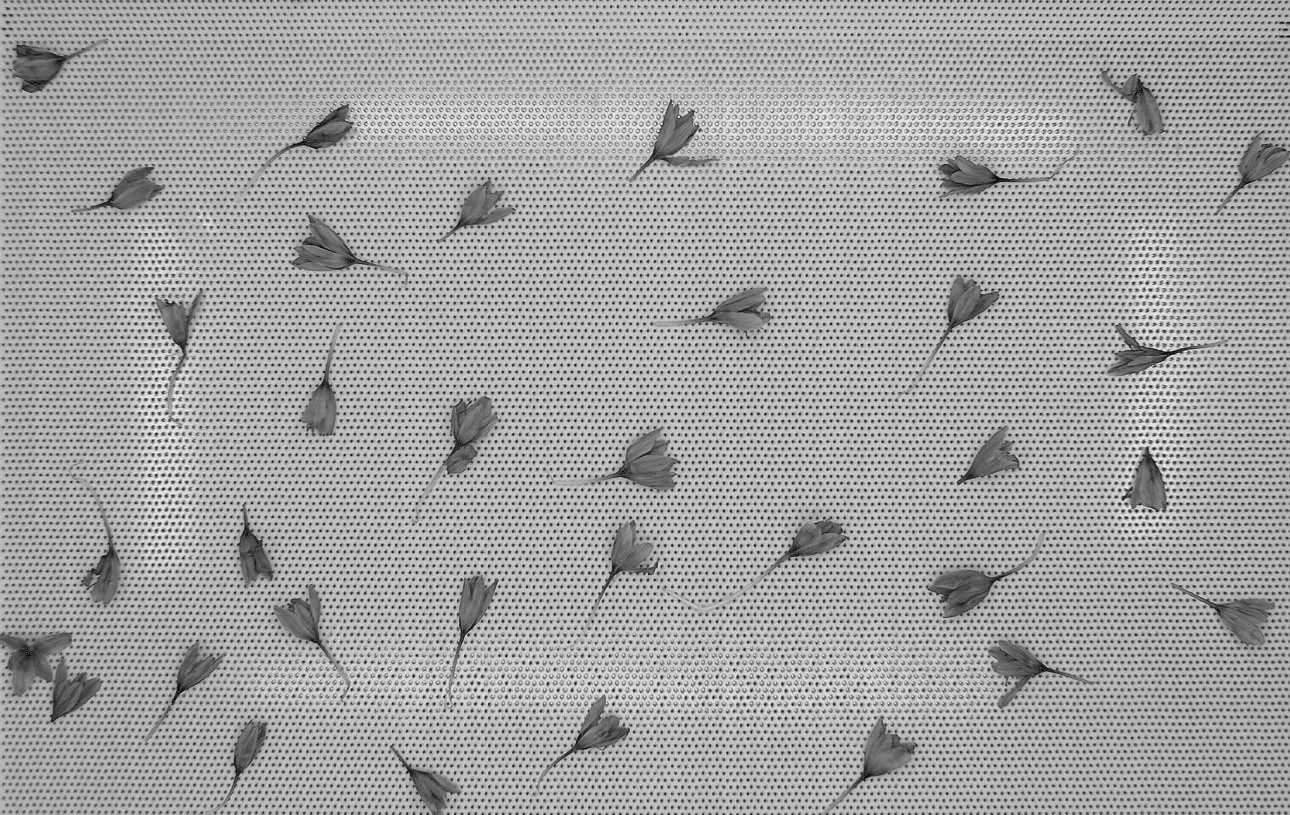

In [ ]:
image1 = cv2.imread('img_01.jpg',cv2.IMREAD_GRAYSCALE)
cv2_imshow(image1)

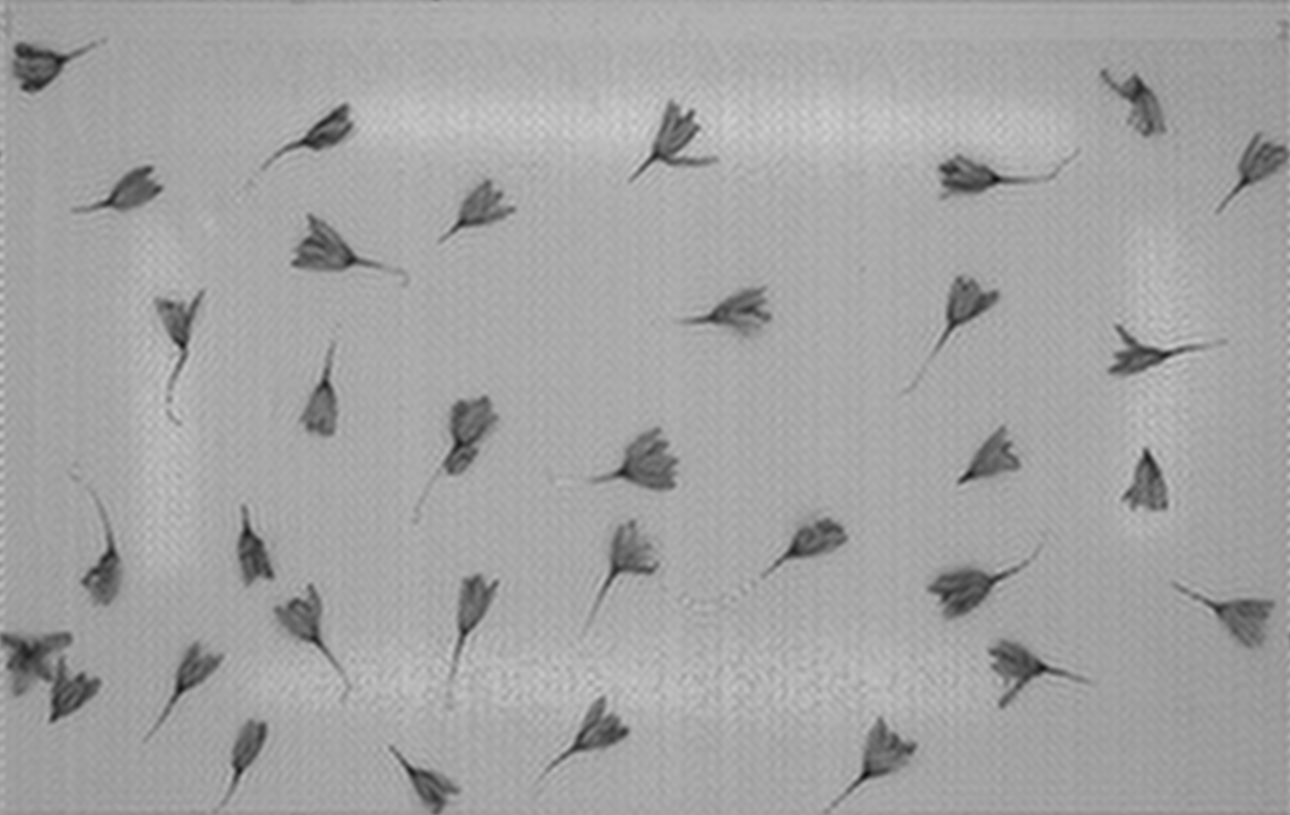

In [ ]:
from scipy import fftpack
from PIL import Image

image_fft = fftpack.fft2(image1)
image_fft2 = image_fft.copy()
r, c = image_fft2.shape
keep_fraction = 0.1
image_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0
image_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0
denoised = fftpack.ifft2(image_fft2).real
cv2_imshow(denoised)

Part B

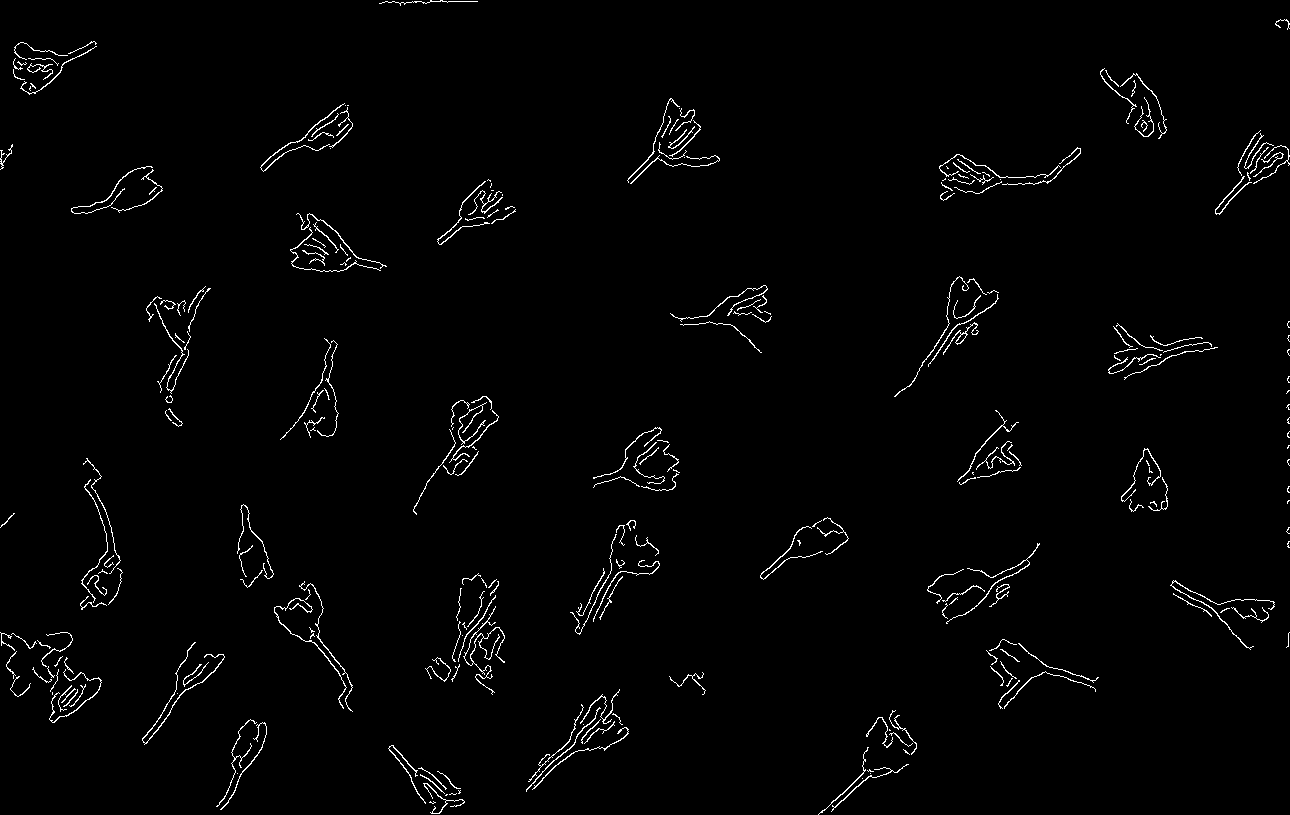

In [ ]:
denoised = np.uint8(denoised)
lower = 10  
upper = 100  
edge = cv2.Canny(denoised, lower, upper)
cv2_imshow(edge)

Part C

In [ ]:
gX = cv2.Sobel(edge, cv2.CV_64F, 1, 0 , ksize=3)
gY = cv2.Sobel(edge, cv2.CV_64F, 0, 1)
orientation = np.arctan2(gY, gX) * (180 / np.pi) % 180
print(orientation)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## 3.

In [5]:
matrix = np.array([
    [0, 0, 0, 0, 255],
    [0, 0, 0, 0, 255],
    [0, 0, 0, 0, 255],
    [0, 0, 0, 0, 255],
    [0, 0, 0, 0, 255],
],dtype='uint8')

gX = cv2.Sobel(matrix, cv2.CV_64F, 1, 0 )
gY = cv2.Sobel(matrix, cv2.CV_64F, 0, 1)
magnitude = np.sqrt((gX ** 2) + (gY ** 2))
orientation = np.arctan2(gY, gX) * (180 / np.pi) % 180

cv2_imshow(matrix)
cv2_imshow(gX)
cv2_imshow(gY)
cv2_imshow(magnitude)
cv2_imshow(orientation)

### 4

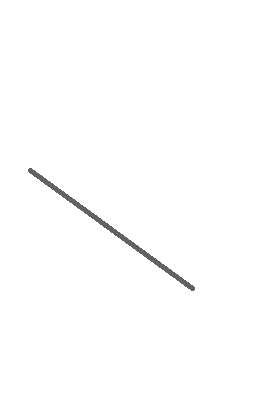

In [ ]:
image2 = cv2.imread('img_02.jpg',cv2.IMREAD_GRAYSCALE)
cv2_imshow(image2)

In [ ]:
edge = cv2.Canny(image2, 50, 200, None, 3)
lines = cv2.HoughLines(edge,1,np.pi/180,50)
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))


m=(y1-y2)/(x1-x2)
b=y1-m*x1

print(f"Line Equation: Y = {m} X + {b}")

Line Equation: Y = 0.7000610873549176 X + 154.7544288332316
